In [1]:
# Libraries needed to run the models
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

In [2]:
# Conecting Colab to the Notebook
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
# Unzip Cats and Dog Dataset
! unzip -q /content/gdrive/MyDrive/CatsDogs.zip 

In [4]:
# I have files that are corrupted and not working. I need to take them out. I'll do DATA CLEANING. 


#DATA CLEANING CATS
path_cat = "/content/CatsDogs/Cats"
for images in os.listdir(path_cat):
  try:
    fpath = os.path.join(path_cat, images)
    fobj = open(fpath, "rb")
    is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
  finally:
    fobj.close()
  if not is_jfif:
    os.remove(fpath) #REMOVE IT FROM THE DATASET OF CATS

# NOW I HAVE A CLEAN DATASET WITHOUT CORRUPTED FILES OF CATS


In [5]:
# SAME PROCESS FOR CLEANING THE FOLDER FOR DOGS. 
#DATA CLEANING DOGS
path_dog = "/content/CatsDogs/Dogs"
for images in os.listdir(path_dog):
  try:
    fpath = os.path.join(path_dog, images)
    fobj = open(fpath, "rb")
    is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
  finally:
    fobj.close()
  if not is_jfif:
    os.remove(fpath) #REMOVE IT FROM THE DATASET OF CATS

# NOW I HAVE A CLEAN DATASET WITHOUT CORRUPTED FILES OF CATS

In [6]:
# I have the CLEAN CAT immages. I've left behind all the corrupted ones. 
# I will take the final images, and then create a dataset with their location so I can use a function later on to feed my CNN.
original_train_cats = "/content/CatsDogs/Cats"
filenames_cats = os.listdir(original_train_cats)
df_cats = pd.DataFrame({'filename':filenames_cats,'label':"Cats"}) # Dataset containing the filename and the cats
df_cats['filename'] = '/content/CatsDogs/Cats/' + df_cats['filename'].astype(str)


In [7]:
# I'll do exacly the same with the DOGS dataset. 
original_train_dogs = "/content/CatsDogs/Dogs"
filenames_dogs = os.listdir(original_train_dogs)
df_dogs = pd.DataFrame({'filename':filenames_dogs,'label':"Dogs"}) #Dataset containing the filename and the dogs
df_dogs['filename'] = '/content/CatsDogs/Dogs/' + df_dogs['filename'].astype(str)


In [8]:

# I create a new dataset containing the two previous ones
df_catsdogs = pd.concat([df_cats, df_dogs]) 

In [9]:
# I mix/shuttle them. I need to do it because if I didn't the model would TRAIN with some images (UNBALANCED) and will TEST only with the other type.
df_catsdogs = df_catsdogs.sample(frac=1).reset_index(drop=True)

In [10]:
# Checking the shuffled and final dataset.
df_catsdogs.head(10)

,filename,label
0,/content/CatsDogs/Cats/5273.jpg,Cats
1,/content/CatsDogs/Cats/3041.jpg,Cats
2,/content/CatsDogs/Dogs/1612.jpg,Dogs
3,/content/CatsDogs/Dogs/3045.jpg,Dogs
4,/content/CatsDogs/Dogs/6688.jpg,Dogs
5,/content/CatsDogs/Cats/5698.jpg,Cats
6,/content/CatsDogs/Cats/3258.jpg,Cats
7,/content/CatsDogs/Dogs/148.jpg,Dogs
8,/content/CatsDogs/Cats/7146.jpg,Cats
9,/content/CatsDogs/Cats/6858.jpg,Cats


In [11]:
df_catsdogs.shape

(23410, 2)

In [12]:
# Get a number of the FIRST 80% shuffleded final dataset.
row2 = int(0.8*len(df_catsdogs)) # Create a row number for the first 80% of the dataset.

In [13]:
# Divide the original dataset into two pieces. First 80% and then, the 20% at the tail. 
df_tv = df_catsdogs.iloc[:row2] # Create new dataset. First 80% will be TRAIN AND VALIDATION
df_t = df_catsdogs.iloc[row2:] # Create dataset with the remaining 20%. TEST SET


In [14]:
# I use IMAGEDATAGENERATOR to create an object that will be used on my CNN. This is for the Train and Validation. 
# The horizontal flip and rotation range are parameters that I apply to all my images to improve the fitting

datagen_tv = ImageDataGenerator(rescale=1/255., validation_split=0.2, horizontal_flip=True, rotation_range=30) #Data Augmentation

In [15]:
# Same as before. I use ImageDataGenerator to create an object that will feed my CNN. This is for the TEST SET.
# I don't give it any other parameters because I want the most "RAW" immages to be tested. I wanna see the real accuracy of the algorithm.
datagen_t = ImageDataGenerator(rescale=1/255.) #test set

In [16]:
# Using the objects I've just created I take the files from my directory and I create the TRAIN AND VALIDATION.

# Train - Datagenerator - TRAIN AND VALIDATION DF
train_ds = datagen_tv.flow_from_dataframe(dataframe=df_tv, directory="/content/CatsDogs", x_col='filename', y_col='label', target_size=(128,128), class_mode='binary', subset='training', seed=7) # seed to 7 because of lucky number
# Validation - Datagenerator -  TRAIN AND VALIDATION DF
valid_ds = datagen_tv.flow_from_dataframe(dataframe=df_tv, directory="/content/CatsDogs", x_col='filename', y_col='label', target_size=(128,128), class_mode='binary', subset='validation', seed=7)

Found 14983 validated image filenames belonging to 2 classes.
Found 3745 validated image filenames belonging to 2 classes.


In [17]:
# Same as before for TESTING when the model is done. RESERVED IMMAGES. I don't do any DATA AUGMENTATION ON THEM. 
test_set = datagen_t.flow_from_dataframe(dataframe=df_t, directory="/content/CatsDogs", x_col='filename', y_col='label', target_size=(128,128), class_mode='binary', shuffle=False)

Found 4682 validated image filenames belonging to 2 classes.


Now that I have created the structure needed to run the models. I'll try different approaces to see what works good. 

In [ ]:
# FIRST MODEL
first_model = Sequential() 
first_model.add(Conv2D(filters= 16, kernel_size = (3,3), input_shape = (128, 128,3))) #Filter 16 to catch features
first_model.add(Activation("relu"))


In [ ]:
# FIRST MODEL Flatten
first_model.add(Flatten())
first_model.add(Dense(64))
first_model.add(Activation("relu"))
first_model.add(Dropout(0.2))

In [ ]:
#Output layer of Original Model
first_model.add(Dense(1))
first_model.add(Activation('sigmoid'))

In [ ]:

# COMPILE
first_model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Summary of FIRST MODEL
first_model.summary() # 16 MILLION PARAMETERS. DEFINITELY TOO HIGH! I NEED TO DROP THEM OUT! REDUCE IT IN NEXT MODELS. 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 activation_25 (Activation)  (None, 126, 126, 16)      0         
                                                                 
 flatten_5 (Flatten)         (None, 254016)            0         
                                                                 
 dense_10 (Dense)            (None, 64)                16257088  
                                                                 
 activation_26 (Activation)  (None, 64)                0         
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
# FIRST MODEL FITTING
first_model_fit = first_model.fit(train_ds, epochs=55, validation_data = valid_ds) # FIRST MODEL

Epoch 1/55
469/469 [==============================] - 112s 237ms/step - loss: 0.8968 - accuracy: 0.6158 - val_loss: 0.6083 - val_accuracy: 0.6756
Epoch 2/55
469/469 [==============================] - 111s 236ms/step - loss: 0.6016 - accuracy: 0.6779 - val_loss: 0.5838 - val_accuracy: 0.6908
Epoch 3/55
469/469 [==============================] - 111s 236ms/step - loss: 0.5826 - accuracy: 0.6913 - val_loss: 0.5762 - val_accuracy: 0.6937
Epoch 4/55
469/469 [==============================] - 110s 236ms/step - loss: 0.5643 - accuracy: 0.7076 - val_loss: 0.5453 - val_accuracy: 0.7186
Epoch 5/55
469/469 [==============================] - 111s 236ms/step - loss: 0.5484 - accuracy: 0.7224 - val_loss: 0.5487 - val_accuracy: 0.7298
Epoch 6/55
469/469 [==============================] - 110s 235ms/step - loss: 0.5474 - accuracy: 0.7185 - val_loss: 0.5460 - val_accuracy: 0.7194
Epoch 7/55
469/469 [==============================] - 110s 235ms/step - loss: 0.5389 - accuracy: 0.7328 - val_loss: 0.5496 -

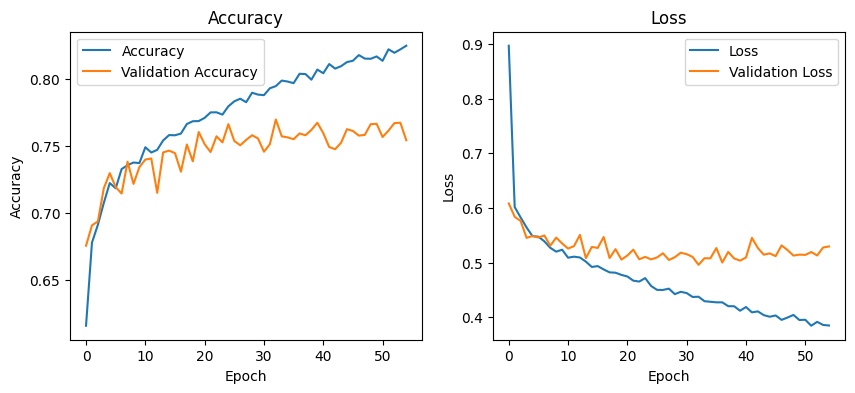

In [ ]:
# Graph for Accuracy and Loss

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(first_model_fit.history['accuracy'])
plt.plot(first_model_fit.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(first_model_fit.history['loss'])
plt.plot(first_model_fit.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Loss', 'Validation Loss'])

In [ ]:
 # Saving the weights of the model to run it later if needed. 
first_model.save_weights('first_model_ml.h5')

In [ ]:
# Evaluate first model. #Accuracy of 0.76 on the test set. 
first_model.evaluate(test_set)

147/147 [==============================] - 13s 91ms/step - loss: 0.5545 - accuracy: 0.7666


[0.5545288324356079, 0.766552746295929]

I need to fix overfitting. I try new model. It is called model 2 on report, but here it is Improved first model. 

In [ ]:

# IMPROVED FIRST MODEL. I try to avoid overfitting. Add maxpooling and dropout. In report it is called SECOND MODEL
improved_first_model = Sequential() 
improved_first_model.add(Conv2D(filters= 16, kernel_size = (3,3), input_shape = (128, 128,3))) #Filter 16 to catch features
improved_first_model.add(Activation("relu"))
improved_first_model.add(MaxPooling2D(pool_size = (2,2)))
improved_first_model.add(Dropout(0.3))



In [ ]:
# IMPROVED FIRST MODEL Flatten
improved_first_model.add(Flatten())
improved_first_model.add(Dense(64))
improved_first_model.add(Activation("relu"))
improved_first_model.add(Dropout(0.6))

In [ ]:
# IMPROVED FIRST MODEL #Output layer of Original Model
improved_first_model.add(Dense(1))
improved_first_model.add(Activation('sigmoid'))

In [ ]:

# COMPILE
improved_first_model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# SECOND MODEL SUMMARY. Number of trainable parameters has been reduced drastically. Strategy worked. Good. 
improved_first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 activation (Activation)     (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 flatten (Flatten)           (None, 63504)             0         
                                                                 
 dense (Dense)               (None, 64)                4064320   
                                                        

In [ ]:
#Validation
improved_first_model_model_fit = improved_first_model.fit(train_ds, epochs=55, validation_data = valid_ds) #Now I have solved the overfitting. But I need to REPARAMETRIZE. To improve the performance.

Epoch 1/55
469/469 [==============================] - 149s 292ms/step - loss: 0.7334 - accuracy: 0.5235 - val_loss: 0.6773 - val_accuracy: 0.5928
Epoch 2/55
469/469 [==============================] - 125s 267ms/step - loss: 0.6808 - accuracy: 0.5404 - val_loss: 0.6642 - val_accuracy: 0.6208
Epoch 3/55
469/469 [==============================] - 138s 295ms/step - loss: 0.6666 - accuracy: 0.5722 - val_loss: 0.6488 - val_accuracy: 0.6414
Epoch 4/55
469/469 [==============================] - 123s 262ms/step - loss: 0.6518 - accuracy: 0.5958 - val_loss: 0.6158 - val_accuracy: 0.6790
Epoch 5/55
469/469 [==============================] - 120s 256ms/step - loss: 0.6331 - accuracy: 0.6322 - val_loss: 0.5894 - val_accuracy: 0.6913
Epoch 6/55
469/469 [==============================] - 120s 257ms/step - loss: 0.6154 - accuracy: 0.6609 - val_loss: 0.5916 - val_accuracy: 0.6943
Epoch 7/55
469/469 [==============================] - 120s 257ms/step - loss: 0.6017 - accuracy: 0.6629 - val_loss: 0.5710 -

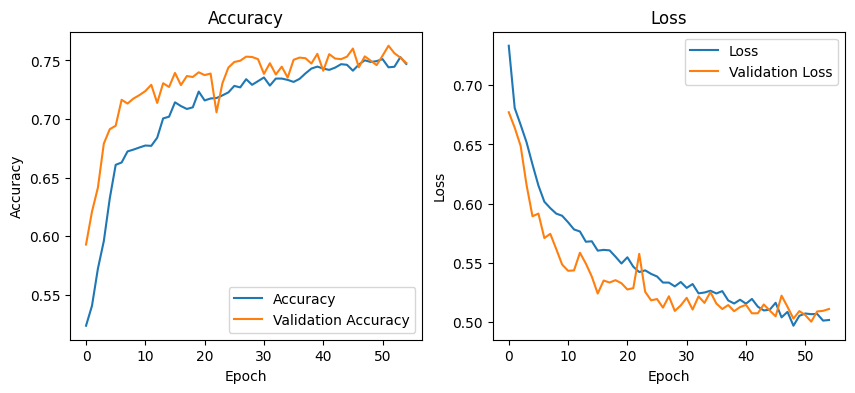

In [ ]:
# Graph for Accuracy and Loss for the improved first model (in report it is called model 2)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(improved_first_model_model_fit.history['accuracy'])
plt.plot(improved_first_model_model_fit.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(improved_first_model_model_fit.history['loss'])
plt.plot(improved_first_model_model_fit.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Loss', 'Validation Loss'])

In [ ]:
# TESTING with the images reserved. Evaluate improved first model. Accuracy 0,7627
improved_first_model.evaluate(test_set)

147/147 [==============================] - 17s 114ms/step - loss: 0.4874 - accuracy: 0.7627


[0.4874405264854431, 0.7627082467079163]

In [ ]:
 # Saving the weights of the model to run it later if needed. 
improved_first_model.save_weights('second_model_ml.h5')

The FIRST MODEL was overfitting. Once I see that I have improved the overfitting, in first_mode_improved. Now, I need to improve the accuracy. 

---



In [ ]:
# I TRY TO IMPROVE ACCURACY. To improve accuracy INCREASE NUMBER OF FILTERS, ADD LAYERS OR BOTH.  Here i go from 16 to 32 FILTERS and ADD a layer. 

# SECOND MODEL. First Layer
second_model = Sequential()
second_model.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape = (128, 128,3))) #More filters catch more features. 16 TO 32
second_model.add(Activation("relu"))
second_model.add(MaxPooling2D(pool_size = (2,2))) # This is to reduce the amount of trainable parameters
second_model.add(Dropout(0.3)) # This also helps with the overfitting problem

In [ ]:
# SECOND MODEL. I add a second layer.
second_model.add(Conv2D(filters= 32, kernel_size = (3,3)))
second_model.add(Activation("relu"))
second_model.add(MaxPooling2D(pool_size = (2,2)))
second_model.add(Dropout(0.3))

In [ ]:
# SECOND MODEL. Fully connected layer. I ESTABLISH A HIGHER DROPOUT FOR A DENSE LAYER LIKE THIS ONE. 
second_model.add(Flatten())
second_model.add(Dense(64))
second_model.add(Activation("relu"))
second_model.add(Dropout(0.6))

In [ ]:
# SECOND MODEL. OUTPUT LAYER. 
second_model.add(Dense(1))
second_model.add(Activation('sigmoid'))

In [ ]:
# SECOND MODEL. COMPILATION.
second_model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# SECOND MODEL SUMMARY. Number of trainable parameters has been reduced drastically. Adding a layer makes hyperparameters to drop. 
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_3 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 61, 61, 32)        0         
                                                      

In [ ]:
#Validation
second_model_fit = second_model.fit(train_ds, epochs=55, validation_data = valid_ds) # I have improved performance and I don't seem to have big problems with overfitting.

Epoch 1/55
469/469 [==============================] - 127s 267ms/step - loss: 0.6918 - accuracy: 0.5392 - val_loss: 0.6524 - val_accuracy: 0.6198
Epoch 2/55
469/469 [==============================] - 123s 263ms/step - loss: 0.6375 - accuracy: 0.6390 - val_loss: 0.6274 - val_accuracy: 0.6796
Epoch 3/55
469/469 [==============================] - 139s 297ms/step - loss: 0.5880 - accuracy: 0.6936 - val_loss: 0.5475 - val_accuracy: 0.7303
Epoch 4/55
469/469 [==============================] - 123s 262ms/step - loss: 0.5607 - accuracy: 0.7155 - val_loss: 0.5293 - val_accuracy: 0.7407
Epoch 5/55
469/469 [==============================] - 129s 274ms/step - loss: 0.5404 - accuracy: 0.7279 - val_loss: 0.5300 - val_accuracy: 0.7447
Epoch 6/55
469/469 [==============================] - 140s 300ms/step - loss: 0.5303 - accuracy: 0.7393 - val_loss: 0.5040 - val_accuracy: 0.7557
Epoch 7/55
469/469 [==============================] - 124s 264ms/step - loss: 0.5154 - accuracy: 0.7529 - val_loss: 0.5055 -

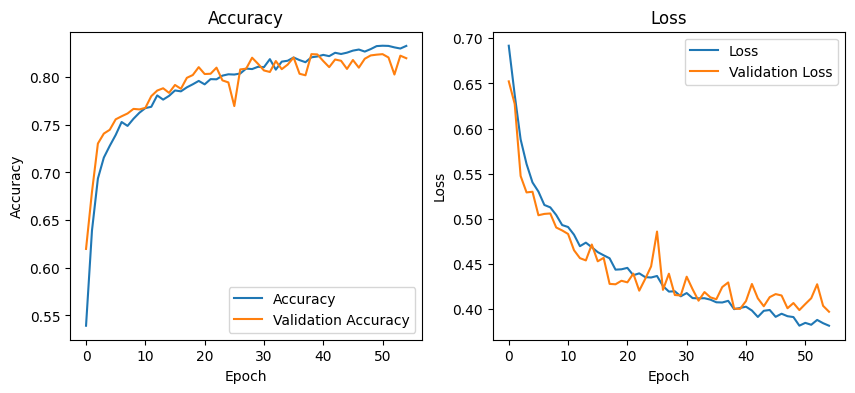

In [ ]:
# Graph for Accuracy and Loss for the second model (on report called model 3)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(second_model_fit.history['accuracy'])
plt.plot(second_model_fit.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(second_model_fit.history['loss'])
plt.plot(second_model_fit.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Loss', 'Validation Loss'])

In [ ]:
 # Saving the weights of the model to run it later if needed. 
second_model.save_weights('second_model_ml.h5')

In [ ]:
# Evaluate second model Accuracy 0.8398
second_model.evaluate(test_set)

147/147 [==============================] - 15s 100ms/step - loss: 0.3774 - accuracy: 0.8398


[0.37742745876312256, 0.8398120403289795]



```
THIRD MODEL. Scope to increase further accuracy.
```



In [18]:
# Third model. I see that increasing filters and layers has helped me to improve accuracy. I increase filters once again from 32 to 64. ALSO ADD A LAYER.
# Same strategy as before. Add layer and filter. It works. Why fix it if it's not broken?
# TERZO MODELO. FIRST LAYER
third_model = Sequential()
third_model.add(Conv2D(filters= 64, kernel_size = (3,3), input_shape = (128, 128,3))) # I change from 32 to 64
third_model.add(Activation("relu"))
third_model.add(MaxPooling2D(pool_size = (2,2)))
third_model.add(Dropout(0.3))

In [19]:
# THIRD MODEL. SECOND LAYYER.
third_model.add(Conv2D(filters= 64, kernel_size = (3,3)))
third_model.add(Activation("relu"))
third_model.add(MaxPooling2D(pool_size = (2,2)))
third_model.add(Dropout(0.3))

In [20]:
# THIRD MODEL. THIRD LAYER.
third_model.add(Conv2D(filters= 64, kernel_size = (3,3)))
third_model.add(Activation("relu"))
third_model.add(MaxPooling2D(pool_size = (2,2)))
third_model.add(Dropout(0.3))

In [21]:
# THIRD MODEL. Fully connected layer.
third_model.add(Flatten())
third_model.add(Dense(64))
third_model.add(Activation("relu"))
third_model.add(Dropout(0.6))

In [22]:
# THIRD MODEL. Output layer of Original Model
third_model.add(Dense(1))
third_model.add(Activation('sigmoid'))

In [23]:
# THIRD MODEL COMPILE
third_model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [24]:
# THIRD MODEL SUMMARY
third_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 activation (Activation)     (None, 126, 126, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                        

In [25]:
# THIRD MODEL FITTING.
third_model_fit = third_model.fit(train_ds, epochs=55, validation_data = valid_ds) 

Epoch 1/55
469/469 [==============================] - 152s 297ms/step - loss: 0.6930 - accuracy: 0.5203 - val_loss: 0.6821 - val_accuracy: 0.5220
Epoch 2/55
469/469 [==============================] - 135s 289ms/step - loss: 0.6677 - accuracy: 0.5894 - val_loss: 0.6226 - val_accuracy: 0.6537
Epoch 3/55
469/469 [==============================] - 139s 295ms/step - loss: 0.6209 - accuracy: 0.6566 - val_loss: 0.5857 - val_accuracy: 0.7012
Epoch 4/55
469/469 [==============================] - 137s 292ms/step - loss: 0.5953 - accuracy: 0.6867 - val_loss: 0.5612 - val_accuracy: 0.7047
Epoch 5/55
469/469 [==============================] - 139s 296ms/step - loss: 0.5731 - accuracy: 0.7052 - val_loss: 0.5207 - val_accuracy: 0.7381
Epoch 6/55
469/469 [==============================] - 152s 324ms/step - loss: 0.5596 - accuracy: 0.7135 - val_loss: 0.5208 - val_accuracy: 0.7509
Epoch 7/55
469/469 [==============================] - 135s 288ms/step - loss: 0.5331 - accuracy: 0.7356 - val_loss: 0.4943 -

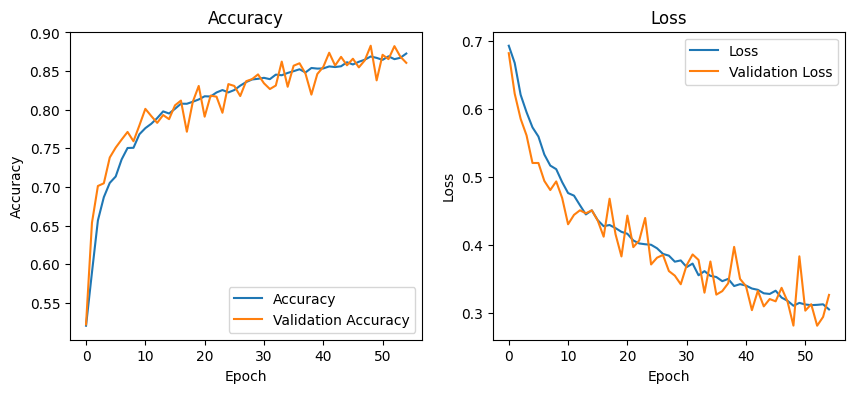

In [26]:
1# Graph for Accuracy and Loss for the third model

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(third_model_fit.history['accuracy'])
plt.plot(third_model_fit.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(third_model_fit.history['loss'])
plt.plot(third_model_fit.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Loss', 'Validation Loss'])

In [27]:
 # Saving the weights of the model to run it later if needed. 
third_model.save_weights('third_model_ml.h5')

In [28]:
# Evaluate third model.
third_model.evaluate(test_set)

147/147 [==============================] - 17s 116ms/step - loss: 0.2870 - accuracy: 0.8840


[0.2870473265647888, 0.884023904800415]



```
# This is formatted as code
```

Cross Validation. 

I try to run many times for 55 epochs has I have been doing til now. Unluckily, GOOGLE COLAB blocks after a while because it's too much computational power. 
I decide to go for a second best option, meaning, reduce the amount of epochs at 30. It's not the best to do, naturally, but giving the scarse computational ressources I have from COLAB I have no other option. 

If provided with more computational power, I'd run it with 55+ epochs. 

It is what it is...

In [ ]:
test_acc = [] #LIST TO ACCURACY
ind1 = 0
ind2 = int(0.2*len(df_tv)) #20% of DF

# FINAL DATA GENERATOR 
datagen_FINAL = ImageDataGenerator(rescale=1.0/255, validation_split=0.2, horizontal_flip=True, rotation_range=30)

# FOR LOOP
for k in range(5):
  #Slice df into train & val, as per the k-th fold
  dfval = df_tv.iloc[ind1:ind2]
  dftrain = df_tv.drop(dfval.index)

  dsval = datagen_FINAL.flow_from_dataframe(dataframe=dfval, directory="/content/CatsDogs", x_col='filename', y_col='label', target_size=(128,128), class_mode='binary')
  
  dstrain = datagen_FINAL.flow_from_dataframe(dataframe=dftrain, directory="/content/CatsDogs", x_col='filename', y_col='label', target_size=(128,128), class_mode='binary')
  
  # Define the FINAL MODEL architecture
  model = Sequential()
  model.add(Conv2D(filters= 64, kernel_size = (3,3), input_shape = (128, 128,3))) #Justification, with literature i change all from 32 to 64
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.3))
  # FINAL MODEL. SECOND LAYYER.
  model.add(Conv2D(filters= 64, kernel_size = (3,3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.3))
  # FINAL MODEL. THIRD LAYER.
  model.add(Conv2D(filters= 64, kernel_size = (3,3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.3))
  # FINAL MODEL. Fully connected layer.
  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation("relu"))
  model.add(Dropout(0.6))
  # FINAL MODEL. Output layer.
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  # THIRD MODEL COMPILE
  model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

  model.fit(dstrain, epochs=35, validation_data = dsval) #EPOCHS ARE ONLY 35 BECAUSE IT TAKES TOO LONG. I KNOW THAT IT IS NOT IDEAL, BUT THIS IS GIVEN THE AMOUNT OF COMPUTATIONAL POWER I HAVE FROM COLAB. 
 

  eval = model.evaluate(test_set)
  test_acc.append(eval[1])
  
  #COMPUTE THE INDIXES
  ind1=ind2
  ind2=int(0.2*(k+2)*len(df_tv))

Found 3745 validated image filenames belonging to 2 classes.
Found 14983 validated image filenames belonging to 2 classes.
Epoch 1/35
469/469 [==============================] - 124s 238ms/step - loss: 0.6944 - accuracy: 0.5105 - val_loss: 0.6915 - val_accuracy: 0.5036
Epoch 2/35
469/469 [==============================] - 112s 238ms/step - loss: 0.6914 - accuracy: 0.5269 - val_loss: 0.6880 - val_accuracy: 0.5669
Epoch 3/35
469/469 [==============================] - 112s 238ms/step - loss: 0.6839 - accuracy: 0.5616 - val_loss: 0.6677 - val_accuracy: 0.6286
Epoch 4/35
469/469 [==============================] - 112s 238ms/step - loss: 0.6539 - accuracy: 0.6236 - val_loss: 0.6214 - val_accuracy: 0.6700
Epoch 5/35
469/469 [==============================] - 111s 237ms/step - loss: 0.6079 - accuracy: 0.6722 - val_loss: 0.5705 - val_accuracy: 0.7162
Epoch 6/35
469/469 [==============================] - 112s 238ms/step - loss: 0.5665 - accuracy: 0.7095 - val_loss: 0.5205 - val_accuracy: 0.7533
E

In [ ]:
np.mean(test_acc) #This is the final result. THE MEAN OF THE CROSS VALIDATION OF MY LAST AND FINAL MODEL. IN GOD WE TRUST. FINE!

0.8570696115493774

In [ ]:
test_acc # Evert fold. From 1 to 5.

[0.8611704111099243,
 0.8667235970497131,
 0.852199912071228,
 0.8566851615905762,
 0.8485689759254456]